In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
wh_wine = pd.read_csv("datasets/winequality-red.csv",delimiter=";")

In [3]:
wh_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df = wh_wine.copy()

In [5]:
df['quality'].apply(lambda x: 1 if x>= 6 else 0)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [6]:
df['target'] = df['quality'].apply(lambda x: 1 if x>= 6 else 0)

In [7]:
df['target'].value_counts()

1    855
0    744
Name: target, dtype: int64

In [8]:
df= df.drop(['quality'],axis=1)

In [9]:
X = df.iloc[:,:-1]

In [10]:
y = df.iloc[:,-1]

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: target, Length: 1599, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, shuffle=True, random_state=2022, stratify=y)

In [15]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [16]:
type(y_train)

pandas.core.series.Series

In [17]:
X_std_train = sc.transform(X_train)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier(max_depth=200, min_samples_split=5, min_samples_leaf=1)

In [20]:
dtc.fit(X_std_train,y_train)

DecisionTreeClassifier(max_depth=200, min_samples_split=5)

In [21]:
X_std_test = sc.transform(X_test)

In [22]:
y_pred = dtc.predict(X_std_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.740625

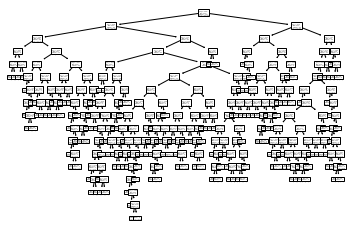

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dtc)
plt.show()

In [26]:
param = {
    'C' : range(1,100,10),
    'kernel' : ['rbf','linear','poly'],
    'degree' : [3,5,7],
    'gamma' : [0.001,0.005, 0.01, 0.05 ,0.1, 0.5 , 1, 5]
}

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
gc = GridSearchCV(svc,param_grid=param,)

In [ ]:
gc.fit(X_std_train,y_train)

In [ ]:
model = gsc.best_estimator_

In [ ]:
y_pred = model.predict(X_std_test)

In [ ]:
accuracy_score(y_std_test,y_pred)